Second part of laboratories were conducted by <a href="https://github.com/jarek-pawlowski">Jarosław Pawłowski</a>. He created notebooks we used in laboratories. I am really glad that I had him as a tutor.

In second course of ML/AI we were build ML models using pytorch.

In this notebook I will present only some task we had as a homework from notebook.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

## Tasks to do
* try to learn neural network adding two binary numbers or performing multiplication by *two*,
* what would happened if we changed input function to `sin(70*x)*exp(x)`, how to fix this?

Adding three binary numbers

In [2]:
# define basic logic gates

# labels
#Y_or = torch.tensor([0, 1, 1, 1], dtype=torch.float32).view(-1, 1)
#Y_and = torch.tensor([0, 0, 0, 1], dtype=torch.float32).view(-1, 1)
#Y_xor = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)

# let's define a model
class Perceptron(torch.nn.Module):
    # constructor
    def __init__(self, size):
        super(Perceptron, self).__init__()
        self.single_neuron = nn.Linear(3, size)
        self.hidden_layer_1st = nn.Linear(size, size)
        self.output_layer = nn.Linear(size, 2)
        self.sigmoid = nn.Sigmoid()
    # method called once the model is executed
    def forward(self, x):
        x = self.single_neuron(x)
        x = self.sigmoid(x)
        x = self.hidden_layer_1st(x)
        x = self.sigmoid(x)
        x = self.output_layer(x)
        return self.sigmoid(x)

# define model and learnig scheme
model = Perceptron(size=6)
optimizer = optim.SGD(model.parameters(), lr=0.5)
MSE = nn.MSELoss()

# train
N_epochs = 10000

train_loss = []
model.train()  # turn on the training mode
#[bit_from_first_num, bit_from_sec_num, carry]
X = torch.tensor([[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]], dtype=torch.float32)
#[carry, normal]
Y = torch.tensor([[0,0], [0,1], [0,1], [1,0], [0,1], [1,0], [1,0], [1,1]], dtype=torch.float32)
for _ in range(N_epochs):
        # this will zero out the gradients for this batch
    optimizer.zero_grad()
        # make predictions
    y_pred = model(X)
        # calculate the MSE loss
    loss = MSE(y_pred, Y)
        # backpropagate the loss
    loss.backward()
        # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())
print("last loss value = ", train_loss[-1])
model.eval()


last loss value =  0.002161429263651371


Perceptron(
  (single_neuron): Linear(in_features=3, out_features=6, bias=True)
  (hidden_layer_1st): Linear(in_features=6, out_features=6, bias=True)
  (output_layer): Linear(in_features=6, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)

In [3]:
for i, [x, y] in enumerate(zip(X,Y)):
  print()
  print(str(x[0]) + "+" + str(x[1]) + "+" + str(x[2]) +"->"+ str(model(x))+" real answer: "+ str(y))


tensor(0.)+tensor(0.)+tensor(0.)->tensor([0.0016, 0.0695], grad_fn=<SigmoidBackward0>) real answer: tensor([0., 0.])

tensor(0.)+tensor(0.)+tensor(1.)->tensor([0.0299, 0.9434], grad_fn=<SigmoidBackward0>) real answer: tensor([0., 1.])

tensor(0.)+tensor(1.)+tensor(0.)->tensor([0.0303, 0.9448], grad_fn=<SigmoidBackward0>) real answer: tensor([0., 1.])

tensor(0.)+tensor(1.)+tensor(1.)->tensor([0.9650, 0.0571], grad_fn=<SigmoidBackward0>) real answer: tensor([1., 0.])

tensor(1.)+tensor(0.)+tensor(0.)->tensor([0.0306, 0.9452], grad_fn=<SigmoidBackward0>) real answer: tensor([0., 1.])

tensor(1.)+tensor(0.)+tensor(1.)->tensor([0.9649, 0.0570], grad_fn=<SigmoidBackward0>) real answer: tensor([1., 0.])

tensor(1.)+tensor(1.)+tensor(0.)->tensor([0.9648, 0.0561], grad_fn=<SigmoidBackward0>) real answer: tensor([1., 0.])

tensor(1.)+tensor(1.)+tensor(1.)->tensor([0.9989, 0.9338], grad_fn=<SigmoidBackward0>) real answer: tensor([1., 1.])


In [4]:
def adding_two_binary_numbers(first_number : str, second_number:str, model):
  if len(first_number) != len(second_number):
    print("Binary numbers should have the same length")
    return -1
  carry = 0
  first_number = first_number[::-1]
  second_number = second_number[::-1]
  result_number = ""
  for first_number_bit, second_number_bit in zip(first_number, second_number):
    first_number_bit = int(first_number_bit)
    second_number_bit = int(second_number_bit)
    X = torch.tensor([[first_number_bit, second_number_bit,carry]], dtype=torch.float32)
    y_pred = model(X).detach().numpy()[0]
    carry, bit = int(np.round(y_pred[0])), int(np.round(y_pred[1]))
    result_number = result_number + str(bit)
  result_number = result_number + str(carry)
  return result_number[::-1]



little test

In [5]:
first = '11'
second = '01'
result = adding_two_binary_numbers(first, second, model)
print(result)

100


Bigger test

In [6]:
def test_of_function_and_model(number_of_bits: int, model):
  max_number = 2**number_of_bits
  number_of_correct = 0
  for i in range(max_number):
    for j in range(max_number):
      first_number = np.binary_repr(i, width=number_of_bits)
      second_number = np.binary_repr(j, width=number_of_bits)
      result = adding_two_binary_numbers(first_number, second_number, model)
      true_result = np.binary_repr(i+j, width=number_of_bits+1)
      if result == true_result:
        number_of_correct +=1
  return number_of_correct / (max_number**2)

In [7]:
result = test_of_function_and_model(5, model)
print(result)

1.0


Creating function: sin(70*x)*exp(x),


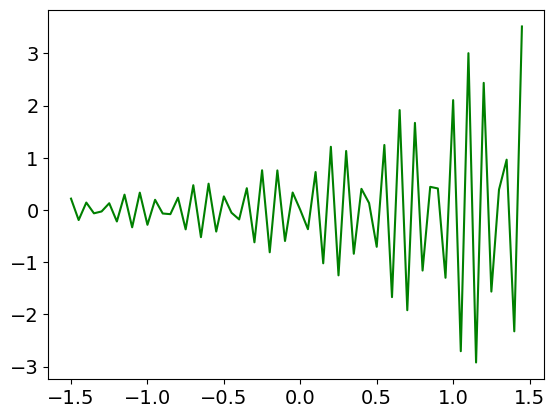

In [8]:
X = torch.arange(-1.5, 1.5, 0.05).view(-1, 1).type(torch.float32)
y = torch.sin(X*70.)*torch.exp(X)
plt.plot(X, y, 'g')
plt.show()

Normalize

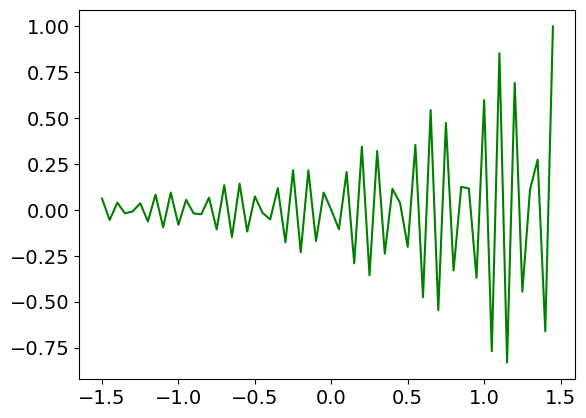

In [9]:
y = y/np.max(y.detach().numpy())
plt.plot(X, y, 'g')
plt.show()

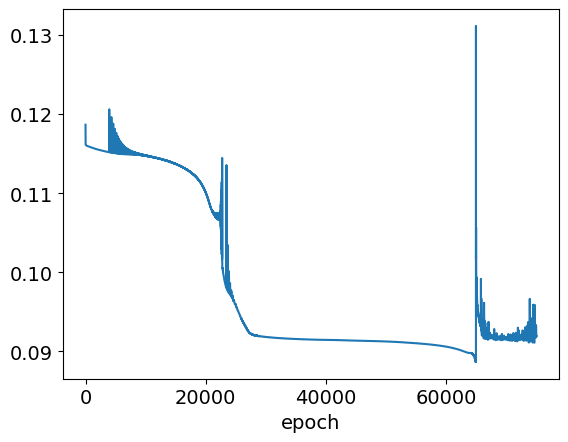

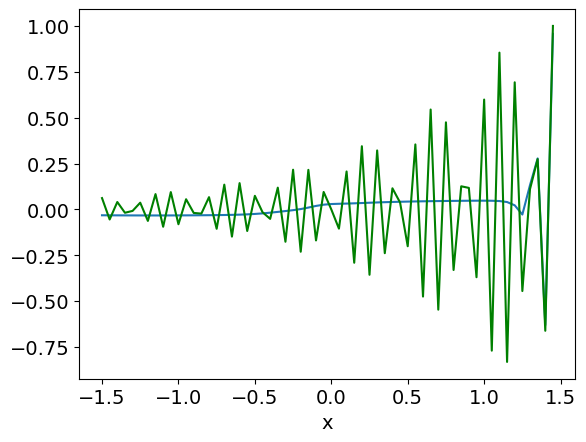

In [10]:
class PerceptronDeepV2(torch.nn.Module):
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeepV2, self).__init__()
        self.first_hidden_layer = nn.Linear(1, hidden_size)
        self.second_hidden_layer = nn.Linear(hidden_size, 2*hidden_size)
        self.third_hidden_layer = nn.Linear(2*hidden_size, 3*hidden_size)
        self.forth_hidden_layer = nn.Linear(3*hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values
    # mathod called once the model is executed
    def forward(self, x):
        x = self.first_hidden_layer(x)
        x = self.activation(x)
        x = self.second_hidden_layer(x)
        x = self.activation(x)
        x = self.third_hidden_layer(x)
        x = self.activation(x)
        x = self.forth_hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return self.activation(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# narrow model
model = PerceptronDeepV2(hidden_size=20).to(device)
X, y = X.to(device), y.to(device)

optimizer = optim.SGD(model.parameters(), lr=0.2)
MSE = nn.MSELoss()

# train
N_epochs = 75000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

Poor performance mainly because the input data have to little number of points -> so add points

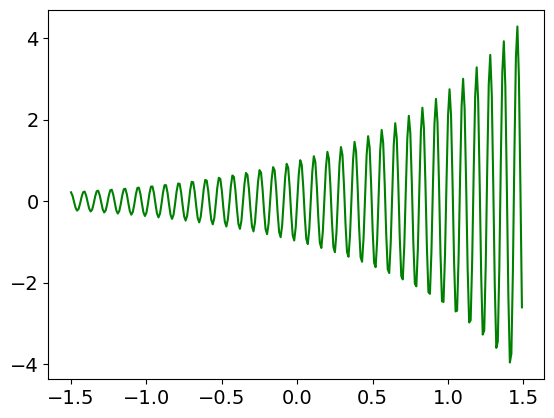

In [11]:
X = torch.arange(-1.5, 1.5, 0.01).view(-1, 1).type(torch.float32)
y = torch.sin(X*70.)*torch.exp(X)
plt.plot(X, y, 'g')
plt.show()

300


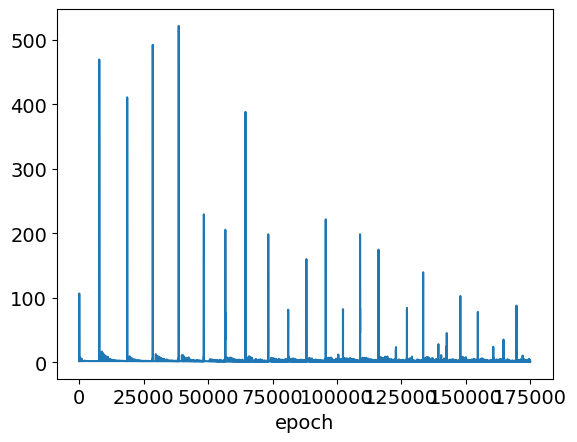

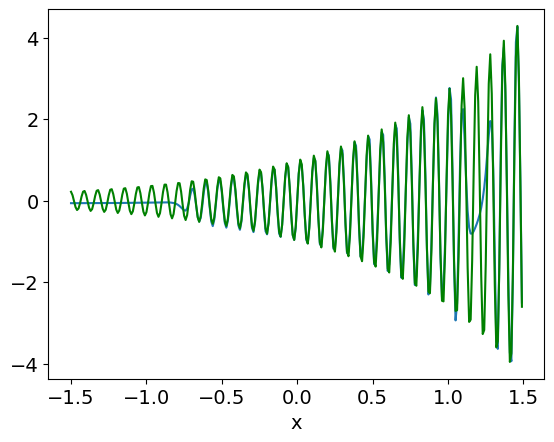

In [12]:
class PerceptronDeep(torch.nn.Module):
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeep, self).__init__()
        self.hidden_layer = nn.Linear(1, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

# narrow model
model = PerceptronDeep(hidden_size=300)

optimizer = optim.Adam(model.parameters(),lr=0.1)
MSE = nn.MSELoss()
print(len(X))
# train
N_epochs = 175000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
#plt.ylim([0,1000])
plt.show()

model.eval()
plt.plot(X.numpy(), model(X).detach().numpy())
plt.plot(X.numpy(), y.numpy(), 'g')
plt.xlabel('x')
plt.show()